In [19]:
import numpy as np
import math
import g2o
import matplotlib.pyplot as plot


In [41]:
optimizer = g2o.SparseOptimizer()
#optimizer.load("/home/eshahrivar/Downloads/g2o_old/g2o/trunk/data/2d/intel/intel.g2o")
optimizer.load("/home/eshahrivar/SLAM/lsslam_framework/octave/data.g2o")

print('num vertices:', len(optimizer.vertices()))
print('num edges:', len(optimizer.edges()), end='\n\n')

num vertices: 1728
num edges: 4830



In [42]:
v = optimizer.vertices()
edge = optimizer.edges()

print(v[1].estimate().translation()[0])

print(v[1].estimate().rotation().angle())

0.004983
0.001136


<IPython.core.display.Javascript object>


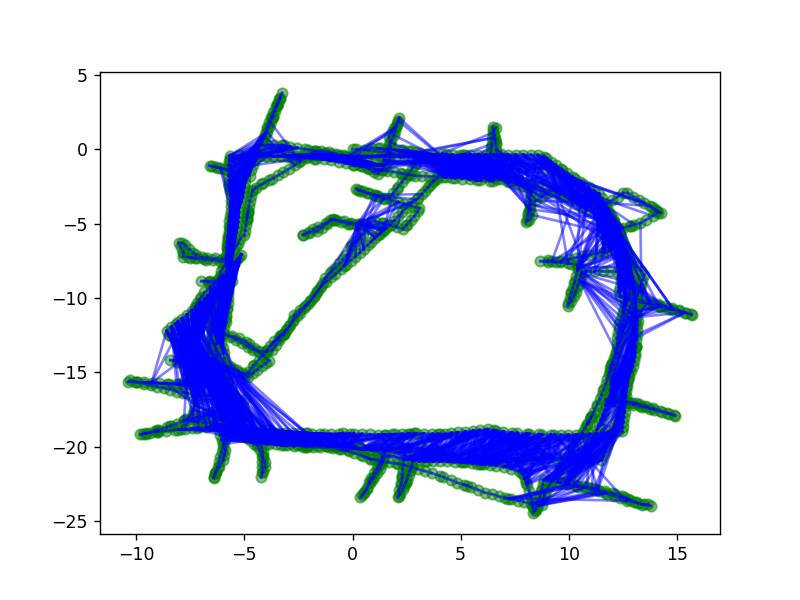

In [43]:
poses = np.array([0,0]) #dummy

for k in v.keys():
    pose = [v[k].estimate().translation()[0], v[k].estimate().translation()[1]]
    poses = np.vstack((poses, pose))
    
%matplotlib notebook

#plot.figure()
plot.plot(poses[1:, 0], poses[1:, 1], 'o', label="Original", alpha=0.5, color="green")

for e in edge:
    plot.plot([e.vertex(0).estimate().translation()[0], e.vertex(1).estimate().translation()[0]], [e.vertex(0).estimate().translation()[1], e.vertex(1).estimate().translation()[1]], alpha=0.5, color="blue")
